# KNN Supervised Learning

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from preprocessing import prepare_data

## Load Data

In [5]:
data = prepare_data()
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,rating,label,text
1,1,5.0,CG,love exclam well made sturdi comfort i love ex...
2,1,5.0,CG,love great upgrad origin i quotat mine coupl year
3,1,5.0,CG,thi pillow save back i love look feel pillow
4,1,1.0,CG,miss inform use great product price exclam i
5,1,5.0,CG,veri nice set good qualiti we set two month


# Training

In [6]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['text'])
x.shape

(40432, 27065)

In [33]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(x, data['category'], test_size=0.3)

In [19]:

knn = KNeighborsClassifier(n_neighbors=2)

In [34]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [35]:
y_prediction = knn.predict(x_test)

In [36]:
print(metrics.classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.79      0.38      0.52      6117
           1       0.59      0.90      0.71      6013

    accuracy                           0.64     12130
   macro avg       0.69      0.64      0.61     12130
weighted avg       0.69      0.64      0.61     12130



In [37]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_prediction))
print("Precision: ",metrics.precision_score(y_test, y_prediction))
print("Recall: ",metrics.recall_score(y_test, y_prediction))
print("F1: ",metrics.f1_score(y_test, y_prediction))

Accuracy:  0.63800494641385
Precision:  0.5884405670665213
Recall:  0.8973889905205389
F1:  0.7107949680563789


In [17]:
error = []

for k in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_prediction = knn.predict(x_test)
    error.append(np.mean(y_prediction != y_test))

Text(0.5, 0, 'K Value')

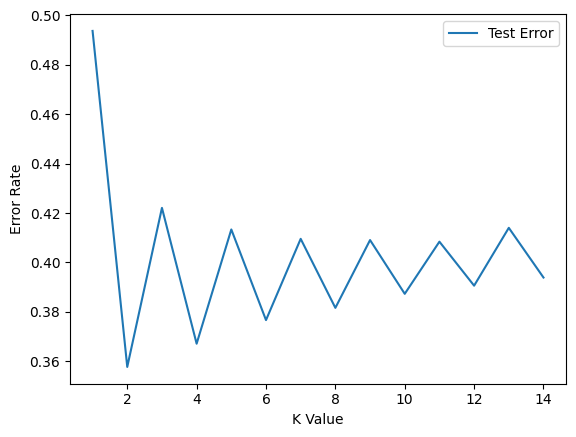

In [18]:
plt.plot(range(2,15),error,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")